In [1]:
import matplotlib.pyplot as plt
import numpy as np

from base_scripts.plotting_functions import (
    team_expertise_priority,
    get_filepath,
    read_utilities_from_file,
    read_rates_from_file,
    read_states_from_file,
    reconstruct_rates,
    reconstruct_rates_matrix_from_dictionary,
    reconstruct_state_probabilities,
    get_plots,
    get_utilities_rates_and_state_probs,
    plot_utilities_and_weighted_rates
)

# Example 1: $e = 0.5, \Lambda = 1.5, 2.5, 6.5, 8.5$

In [74]:
lambda_1 = 0.5
lambda_2 = 1
mu = 0.7
num_of_servers = 4
threshold = 7
system_capacity = 10
buffer_capacity = 7

parameters_1 = {
    "lambda_1": lambda_1,
    "lambda_2": lambda_2,
    "mu": mu,
    "num_of_servers": num_of_servers,
    "threshold": threshold,
    "system_capacity": system_capacity,
    "buffer_capacity": buffer_capacity,
}
parameters_2, parameters_3, parameters_4 = parameters_1.copy(), parameters_1.copy(), parameters_1.copy()
parameters_2["lambda_1"], parameters_2["lambda_2"] = 1.0, 1.5
parameters_3["lambda_1"], parameters_3["lambda_2"] = 3.0, 3.5
parameters_4["lambda_1"], parameters_4["lambda_2"] = 4.0, 4.5

parameters_temp = parameters_3.copy()

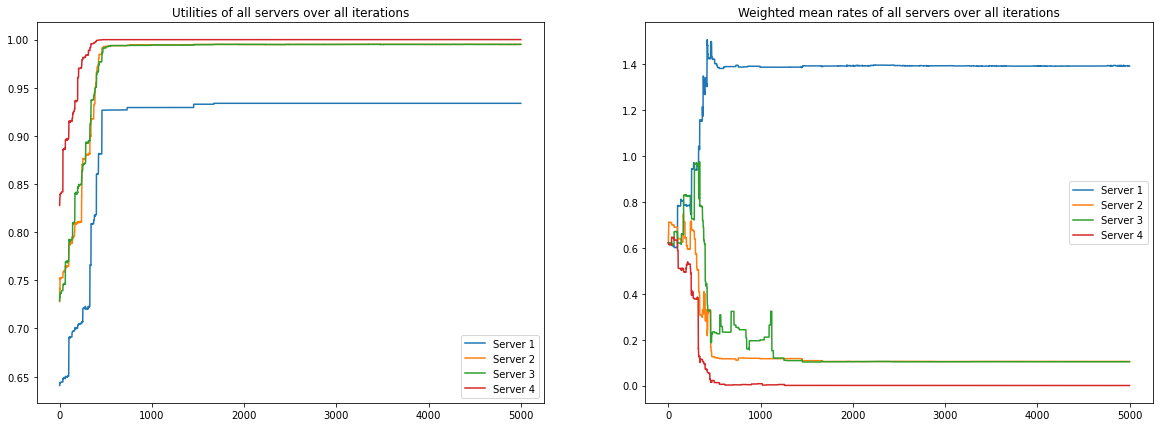

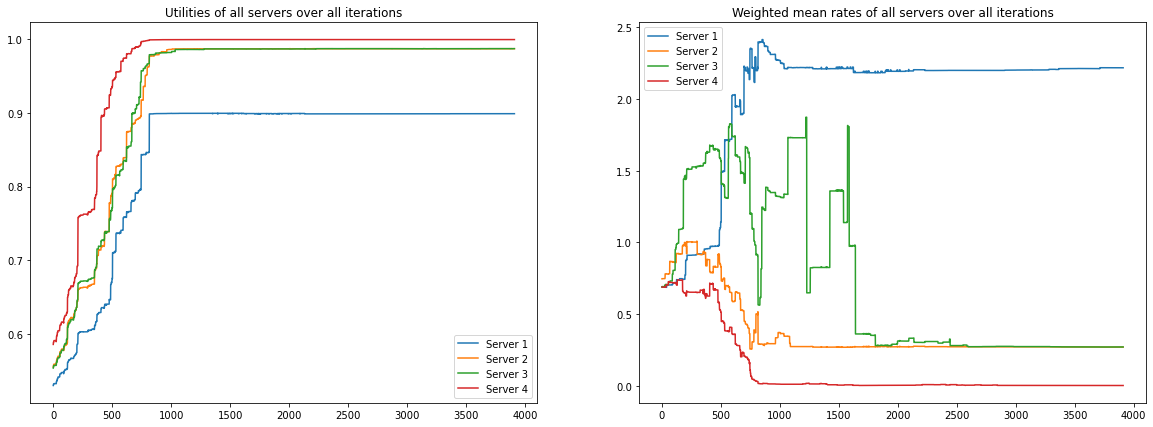

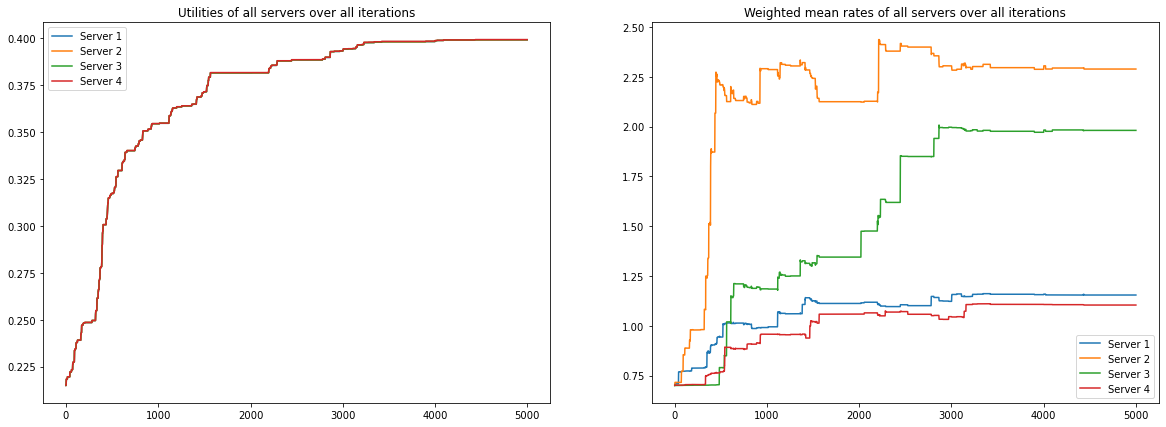

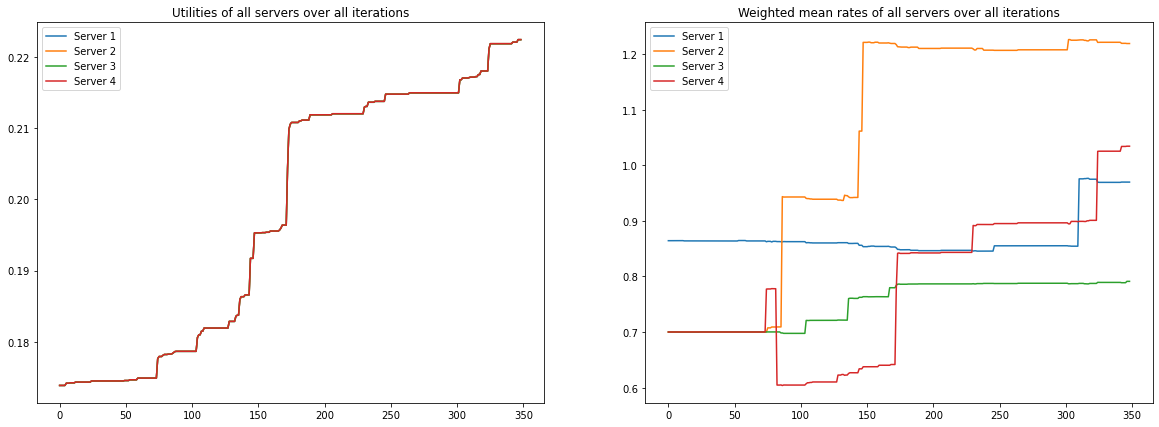

In [4]:
plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_1, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_2, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_3, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_4, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

# Example 2: $e = 0.5, \Lambda = 1.5, 6.5$

Using the final rates of the first case as the initial rates of the second case. 

In [7]:
lambda_1 = 0.5
lambda_2 = 1
mu = 0.7
num_of_servers = 4
threshold = 7
system_capacity = 10
buffer_capacity = 7

parameters_1 = {
    "lambda_1": lambda_1,
    "lambda_2": lambda_2,
    "mu": mu,
    "num_of_servers": num_of_servers,
    "threshold": threshold,
    "system_capacity": system_capacity,
    "buffer_capacity": buffer_capacity,
}
parameters_2, parameters_3 = parameters_1.copy(), parameters_1.copy()
parameters_2["lambda_1"], parameters_2["lambda_2"] = 3.0, 3.6

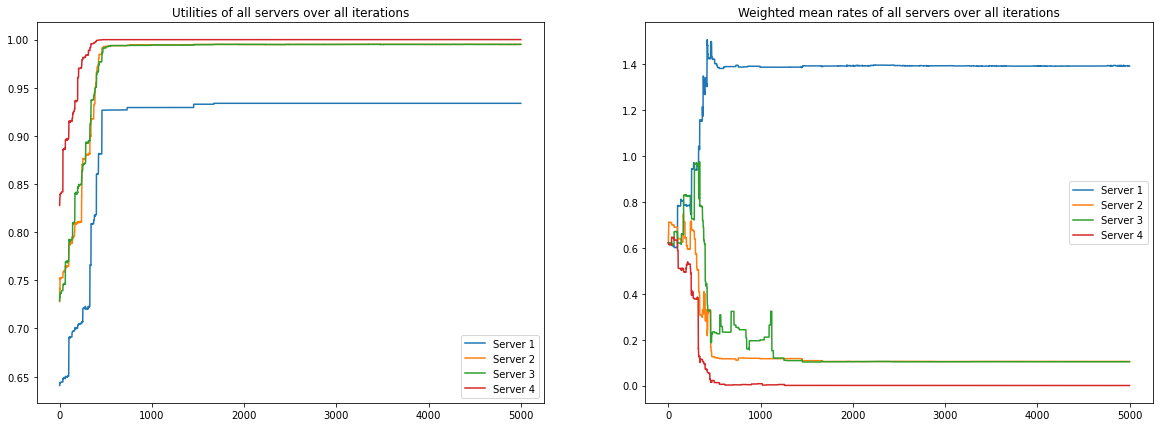

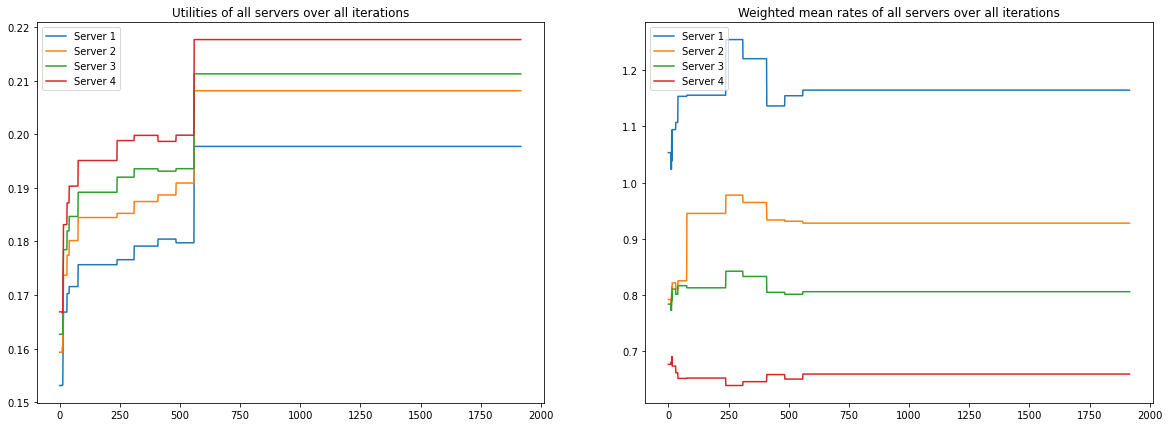

In [8]:
plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_1, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)
plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_2, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

# Example 3: $e = 0.5, \Lambda = 1.5, 6.5, 1.6$

All the experiments are combined in one run:
- Start with $\Lambda = 1.5$
- Once system is stable, flood it $\Lambda = 6.5$
- Then set it back to $\Lambda = 1.6$

In [2]:
def get_plots(utilities, all_rates, all_state_probs, num_of_servers):
    """
    Plot the utilities and the weighte mean rates of all servers over all
    iterations.

    Weighted rate = Rate at state (u,v) * Probability of state (u,v)
    """
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    for srv in range(num_of_servers):
        ax1.plot([util[srv] for util in utilities])

    for srv in range(1, num_of_servers + 1):
        server_mean_weighted_rates = []
        for itr, _ in enumerate(all_rates):
            current_iteration_mean_weighted_rate = 0
            for state, current_rate in all_rates[itr][srv].items():
                current_state_prob = all_state_probs[itr][state]
                if not np.isnan(current_state_prob) and state != (0, 0):
                    current_iteration_mean_weighted_rate += (
                        current_rate * current_state_prob
                    )
            server_mean_weighted_rates.append(current_iteration_mean_weighted_rate)
        ax2.plot(server_mean_weighted_rates)

    ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
    ax1.set_title("Utilities of all servers over all iterations")
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
    ax2.set_title("Weighted mean rates of all servers over all iterations")

In [3]:
def get_utilities_rates_and_state_probs(
    filepath, threshold, system_capacity, buffer_capacity
):
    """
    Construct the utilities, rates and state probabilities from file.
    """
    utilities = read_utilities_from_file(filepath + "/utilities.csv")
    raw_rates = read_rates_from_file(filepath + "/rates.csv")
    raw_state_probs = read_states_from_file(filepath + "/state_probs.csv")
    reconstructed_rates = reconstruct_rates(
        raw_rates,
        system_capacity=system_capacity,
        buffer_capacity=buffer_capacity,
        threshold=threshold,
    )
    reconstructed_state_probs = reconstruct_state_probabilities(
        states_from_file=raw_state_probs,
        system_capacity=system_capacity,
        buffer_capacity=buffer_capacity,
    )
    return utilities, reconstructed_rates, reconstructed_state_probs


In [4]:
lambda_1 = 0.5
lambda_2 = 1
mu = 0.7
num_of_servers = 4
threshold = 7
system_capacity = 10
buffer_capacity = 7

parameters_1 = {
    "lambda_1": lambda_1,
    "lambda_2": lambda_2,
    "mu": mu,
    "num_of_servers": num_of_servers,
    "threshold": threshold,
    "system_capacity": system_capacity,
    "buffer_capacity": buffer_capacity,
}
parameters_2, parameters_3 = parameters_1.copy(), parameters_1.copy()
parameters_2["lambda_1"], parameters_2["lambda_2"] = 3.0, 3.6
parameters_3["lambda_1"] = 0.6

In [5]:
utils_1, rates_1, states_1 = get_utilities_rates_and_state_probs(
    filepath=get_filepath(parameters_1, 0.5),
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

In [6]:
utils_2, rates_2, states_2 = get_utilities_rates_and_state_probs(
    filepath=get_filepath(parameters_2, 0.5),
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

In [7]:
utils_3, rates_3, states_3 = get_utilities_rates_and_state_probs(
    filepath=get_filepath(parameters_3, 0.5),
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

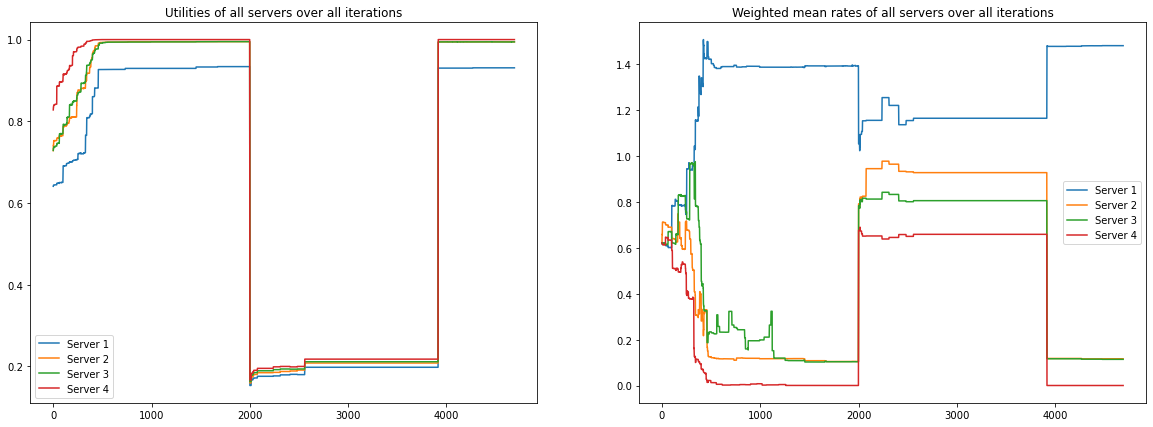

In [9]:
max_iter_1 = 2000

tot_utils = utils_1[:max_iter_1] + utils_2 + utils_3
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in tot_utils])

for srv in range(1, num_of_servers + 1):
    server_mean_weighted_rates = []
    # Rates_1
    for itr, _ in enumerate(rates_1):
        if itr < max_iter_1:
            current_iteration_mean_weighted_rate = 0
            for state, current_rate in rates_1[itr][srv].items():
                current_state_prob = states_1[itr][state]
                if not np.isnan(current_state_prob) and state != (0, 0):
                    current_iteration_mean_weighted_rate += (
                        current_rate * current_state_prob
                    )
            server_mean_weighted_rates.append(current_iteration_mean_weighted_rate)
            
    # Rates_2
    for itr, _ in enumerate(rates_2):
        current_iteration_mean_weighted_rate = 0
        for state, current_rate in rates_2[itr][srv].items():
            current_state_prob = states_2[itr][state]
            if not np.isnan(current_state_prob) and state != (0, 0):
                current_iteration_mean_weighted_rate += (
                    current_rate * current_state_prob
                )
        server_mean_weighted_rates.append(current_iteration_mean_weighted_rate)

    # Rates_3
    for itr, _ in enumerate(rates_3):
        current_iteration_mean_weighted_rate = 0
        for state, current_rate in rates_3[itr][srv].items():
            current_state_prob = states_3[itr][state]
            if not np.isnan(current_state_prob) and state != (0, 0):
                current_iteration_mean_weighted_rate += (
                    current_rate * current_state_prob
                )
        server_mean_weighted_rates.append(current_iteration_mean_weighted_rate)


    ax2.plot(server_mean_weighted_rates)

ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")
ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Weighted mean rates of all servers over all iterations")

When the model starts to flood new states are being explored that haven't been explored before. When the model goes back to normal it looks like the previously learned rates are instantly reused.

Intersting sidenote: The above plot does not match with the plot below

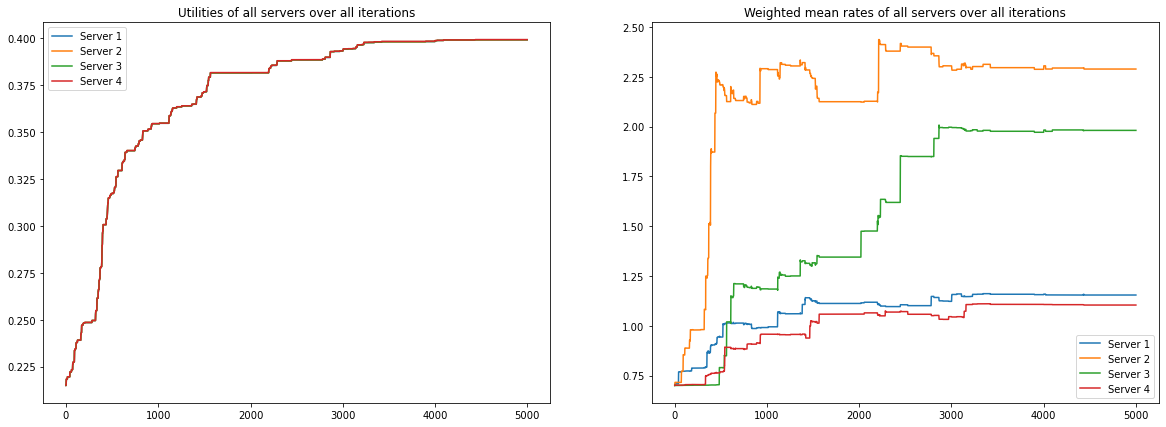

In [75]:
plot_utilities_and_weighted_rates(
    filepath=get_filepath(parameters_temp, 0.5),
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

## Looking into rates and state probs

## Parameters_1

In [126]:
np.round(states_1[2000], 2)

array([[0.86, 0.13, 0.01, 0.  , 0.  , 0.  ,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [127]:
np.round(reconstruct_rates_matrix_from_dictionary(rates_1[2000][1], system_capacity, buffer_capacity), 2)

array([[0.  , 9.83, 9.97, 9.97, 9.95, 0.  , 0.6 , 0.05, 0.68, 0.67, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.22, 1.36, 0.84, 0.01],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.93, 0.7 , 0.87, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.93, 0.84, 0.7 , 0.2 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.02, 0.7 , 1.14, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.7 , 0.23, 0.7 , 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.7 , 0.7 , 0.7 , 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.7 , 0.7 , 0.7 , 0.7 ]])

## Parameters_2

In [128]:
np.round(states_2[1900], 2)

array([[0.05, 0.04, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.  , 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.  , 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.  , 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.  , 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.01, 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.02, 0.01, 0.  , 0.  ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.06, 0.12, 0.23, 0.44]])

In [129]:
np.round(reconstruct_rates_matrix_from_dictionary(rates_2[1900][1], system_capacity, buffer_capacity), 2)

array([[0.  , 9.83, 9.97, 7.76, 9.8 , 0.  , 0.6 , 0.05, 0.68, 0.67, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.22, 1.36, 0.84, 0.01],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.93, 0.7 , 0.87, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.03, 0.84, 0.7 , 0.2 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.02, 0.7 , 1.14, 1.01],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.7 , 0.23, 0.7 , 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.33, 0.7 , 0.7 , 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.29, 0.7 , 0.7 , 0.7 ]])

## Parameters_3

In [130]:
np.round(states_3[750], 2)

array([[0.85, 0.14, 0.01, 0.  , 0.  , 0.  ,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [131]:
np.round(reconstruct_rates_matrix_from_dictionary(rates_3[750][1], system_capacity, buffer_capacity), 2)

array([[0.  , 9.94, 9.97, 9.57, 9.94, 0.  , 0.6 , 0.05, 0.68, 0.67, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.22, 1.36, 0.84, 0.01],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.93, 0.7 , 0.87, 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.03, 0.84, 0.7 , 0.2 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.02, 0.7 , 1.14, 1.01],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.7 , 0.23, 0.7 , 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.33, 0.7 , 0.7 , 0.7 ],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.29, 0.7 , 1.23, 0.7 ]])